In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from matplotlib import animation
from IPython.display import HTML
# dir = os.path.dirname(os.path.realpath(__file__))
# os.chdir(dir)
%matplotlib inline


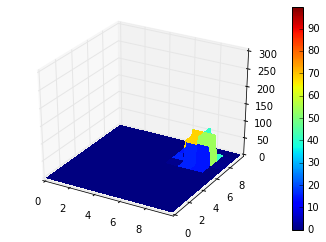

In [15]:
dx = 0.1
dy = dx
a = 2.
v = 2.
grid_x = 100
grid_y = 100
nt = 100
d1 = 0.1
d2 = 0.05
dt = d2 * (dx**2)/v

def init():
    T = np.zeros((grid_x,grid_y))
    T[70:90, 70:90] = 80.
    return T

x = np.linspace(0,dx * (grid_x - 1), grid_x)
y = np.linspace(0,dy * (grid_y - 1), grid_y)
X,Y = np.meshgrid(x,y)
cmap = plt.cm.get_cmap("jet")
cmap.set_over('grey')
g = 5
levels = np.arange(0.,100.,0.2)
count = 1
icount = 0
T = init()
fig = plt.figure()
ax = fig.gca(projection='3d')
cl = plt.contourf(X,Y,T,levels,cmap=cmap)
plt.colorbar(cl)

def plot_activate(X,Y,n):
    global T
    plt.cla()
    plt.clf()
    plt.xlim(0.,np.max(x))
    plt.ylim(0.,np.max(x))
    plt.contourf(X,Y,T,levels,cmap=cmap)
    plt.text(np.max(x)*0.8,np.max(y)+dy,"t=%01.5f"%(dt*n))

def plot3d_activate(X,Y,n):
    ax.cla()
    ax.set_xlim(0.,np.max(x))
    ax.set_ylim(0.,np.max(y))
    ax.set_zlim(0.,300)
    cl = ax.plot_surface(X,Y,T,linewidth=0,vmin=np.min(levels),vmax=np.max(levels), cmap=cmap,antialiased=False)

def cyc_var(n, plot_type=1):
    global T,d1,d2
    Tn = T.copy()
    left = np.roll(Tn,1,axis=0)
    right = np.roll(Tn,-1,axis=0)
    up = np.roll(Tn,-1,axis=1)
    down = np.roll(Tn,1,axis=1)
    T = Tn-dt*(np.sqrt(80**2-Tn ** 2))/dx*(2 * Tn - left - down) + d2 * (left+right+up+down-4*Tn)
    if plot_type == 1:
        plot_activate(X,Y,n)
    if plot_type == 2:
        plot3d_activate(X,Y,n)
    #ax.colorbar(cl)
    #ax.text(np.max(x)*0.8,np.max(y)+dy,"t=%01.5f"%(dt*n))
    # plt.savefig('cyclic_%04i.jpg'%(icount))
    # icount += 1

def cyc_con(n, plot_type=1):
    global T,d1,d2
    Tn = T.copy()
    left = np.roll(Tn,1,axis=0)
    right = np.roll(Tn,-1,axis=0)
    up = np.roll(Tn,-1,axis=1)
    down = np.roll(Tn,1,axis=1)
    T = Tn-d1*(2 * Tn - 1.5*left - 0.5*down) + d2 * (left+right+up+down-4*Tn)
    if plot_type == 1:
        plot_activate(X,Y,n)
    if plot_type == 2:
        plot3d_activate(X,Y,n)
    # plt.savefig('cyclic_%04i.jpg'%(icount))
    # icount += 1

def der_var(n, plot_type=1):
    global T,d1,d2
    T[0,:],T[:,0], T[grid_x-1,:], T[:, grid_y-1] = 0,0,0,0
    Tn = T.copy()
    left = np.roll(Tn,1,axis=0)
    right = np.roll(Tn,-1,axis=0)
    up = np.roll(Tn,-1,axis=1)
    down = np.roll(Tn,1,axis=1)
    T = Tn-dt*(np.sqrt(Tn ** 2))/dx*(2 * Tn - left - down) + d2 * (left+right+up+down-4*Tn)
    if plot_type == 1:
        plot_activate(X,Y,n)
    if plot_type == 2:
        plot3d_activate(X,Y,n)

def neu(n, g=0, plot_type=1):
    global T,d1,d2
    Tn = T.copy()
    left = np.roll(Tn,1,axis=0)
    right = np.roll(Tn,-1,axis=0)
    up = np.roll(Tn,-1,axis=1)
    down = np.roll(Tn,1,axis=1)
    ghost1 = -2 * dx * g + Tn[1,1:grid_y-1]
    ghost2 = -2 * dx * g+Tn[grid_x-2,1:grid_y-1]
    ghost3 = -2 * dx * g+Tn[grid_x-2,1:grid_y-1]
    ghost4 = -2 * dx * g+Tn[1:grid_x-1,grid_y-2]
    ghost1 = ghost1 > 0 * ghost1
    ghost2 = ghost2 > 0 * ghost2
    ghost3 = ghost3 > 0 * ghost3
    ghost4 = ghost4 > 0 * ghost4
    left[0,:],right[grid_x-1,:],up[:,grid_y-1],down[:,0] = 0,0,0,0
    T = Tn-dt*(np.sqrt(Tn ** 2))/dx*(2 * Tn - left - down) + d2 * (left+right+up+down-4*Tn)
    T[0,1:grid_y-1] += d2 * ghost1 + dt*(np.sqrt(T[0,1:grid_y-1] ** 2))/dx*ghost1
    T[grid_x-1,1:grid_y-1] += d2 * ghost2
    T[1:grid_x-1,0] += d2 * ghost3 + dt*(np.sqrt(T[1:grid_x-1,0] ** 2))/dx*ghost3
    T[1:grid_x-1,grid_y-1] += d2 * ghost4
    #T[0,0],T[0,grid_y-1],T[grid_x-1,0],T[grid_x-1,grid_y-1] = Tn[0,0], Tn[0,grid_y-1], Tn[grid_x-1,0],Tn[grid_x-1,grid_y-1]
    if plot_type == 1:
        plot_activate(X,Y,n)
    if plot_type == 2:
        plot3d_activate(X,Y,n)
#fig = plt.figure()
a = animation.FuncAnimation(fig, neu,fargs=(5,2), frames=400,interval=10)
#a.save('3d-der-var.mp4',fps=30,extra_args=['-vcodec','libx264'])
# plt.show()

In [16]:
HTML(a.to_html5_video())